# Data analysis EON 

## Defined Task

"*V souboru data.csv najdete podklady k vypracování úkolu. Jedná se o spotřebu v síti v ČR.*

**Úkoly:**

_Časovou řadu (ČŘ) graficky znázorněte_

*Jsou v ČŘ nějaké opakující se vzory, časová závislost atd. ?*

*Vidíte v ČŘ něco zajímavého?*

*Zkuste predikovat hodinové hodnoty z posledního týdne.*

*Můžete použít více metod a porovnat je mezi sebou.*

*Můžete použít externí zdroj dat (teploty, osvit, atd), kreativitě se meze nekladou*"

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import xgboost as xgb

data_path = ("data/data.csv")
df = pd.read_csv(data_path, sep=';')
df.set_index('Date', inplace=True)
df.head()

,Values
Date,
01.01.2023 0:00,5978.383301
01.01.2023 1:00,6028.000000
01.01.2023 2:00,5930.549805
01.01.2023 3:00,6011.733398
01.01.2023 4:00,5814.299805


In [4]:
df.shape

(11456, 1)

In [6]:
df.dtypes

Values    float64
dtype: object

In [7]:
df.isna().sum()

Values    0
dtype: int64

In [8]:
df['Time'] = np.arange(len(df.index))

df.head()

,Values,Time
Date,,
01.01.2023 0:00,5978.383301,0
01.01.2023 1:00,6028.000000,1
01.01.2023 2:00,5930.549805,2
01.01.2023 3:00,6011.733398,3
01.01.2023 4:00,5814.299805,4


In [32]:
df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M')
df["Hour"] = df.index.hour
df['Day'] = df.index.day
df['Year'] = df.index.year
df['Month'] = df.index.month
df['WeekDay'] = df.index.day_name()
df.tail()

,Values,Time,Hour,Day,Year,Month,WeekDay,prediction
Date,,,,,,,,
2024-04-22 04:00:00,6600.433105,11451,4,22,2024,4,Monday,5824.948730
2024-04-22 05:00:00,7198.100098,11452,5,22,2024,4,Monday,6034.508789
2024-04-22 06:00:00,8250.666992,11453,6,22,2024,4,Monday,6960.247559
2024-04-22 07:00:00,8862.599609,11454,7,22,2024,4,Monday,7783.143555
2024-04-22 08:00:00,9113.727539,11455,8,22,2024,4,Monday,8134.017090


## Grafické znázornění časové řady pro hodinový graf

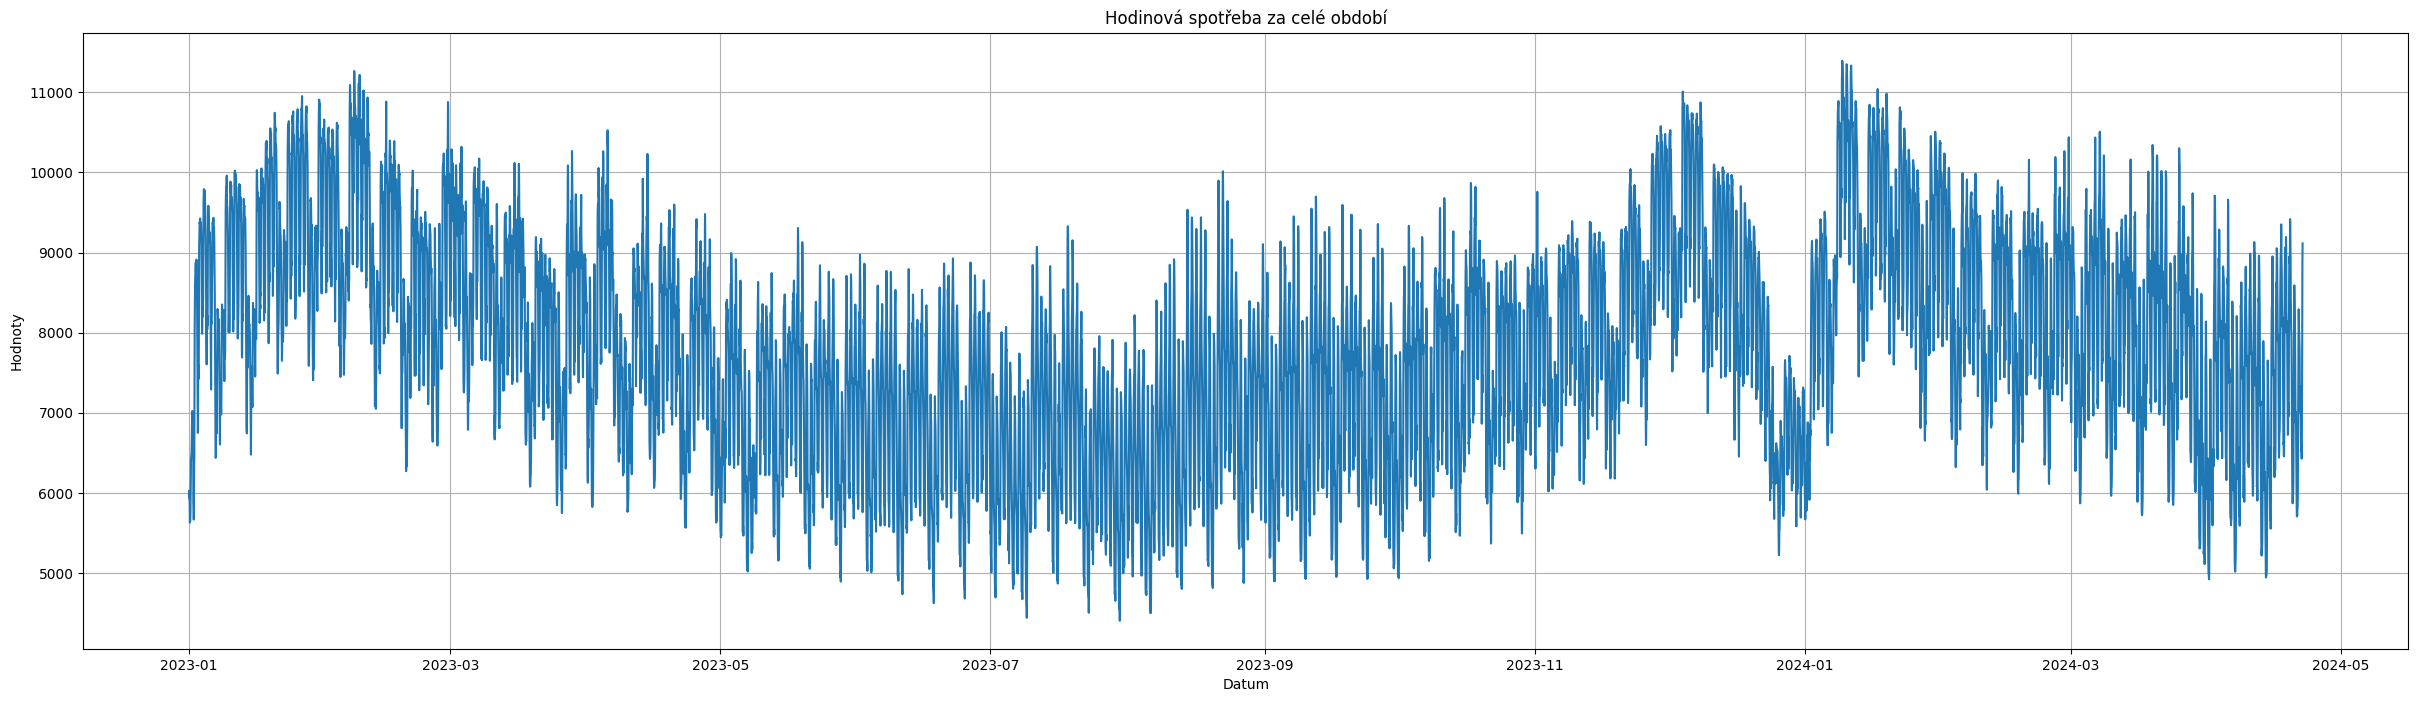

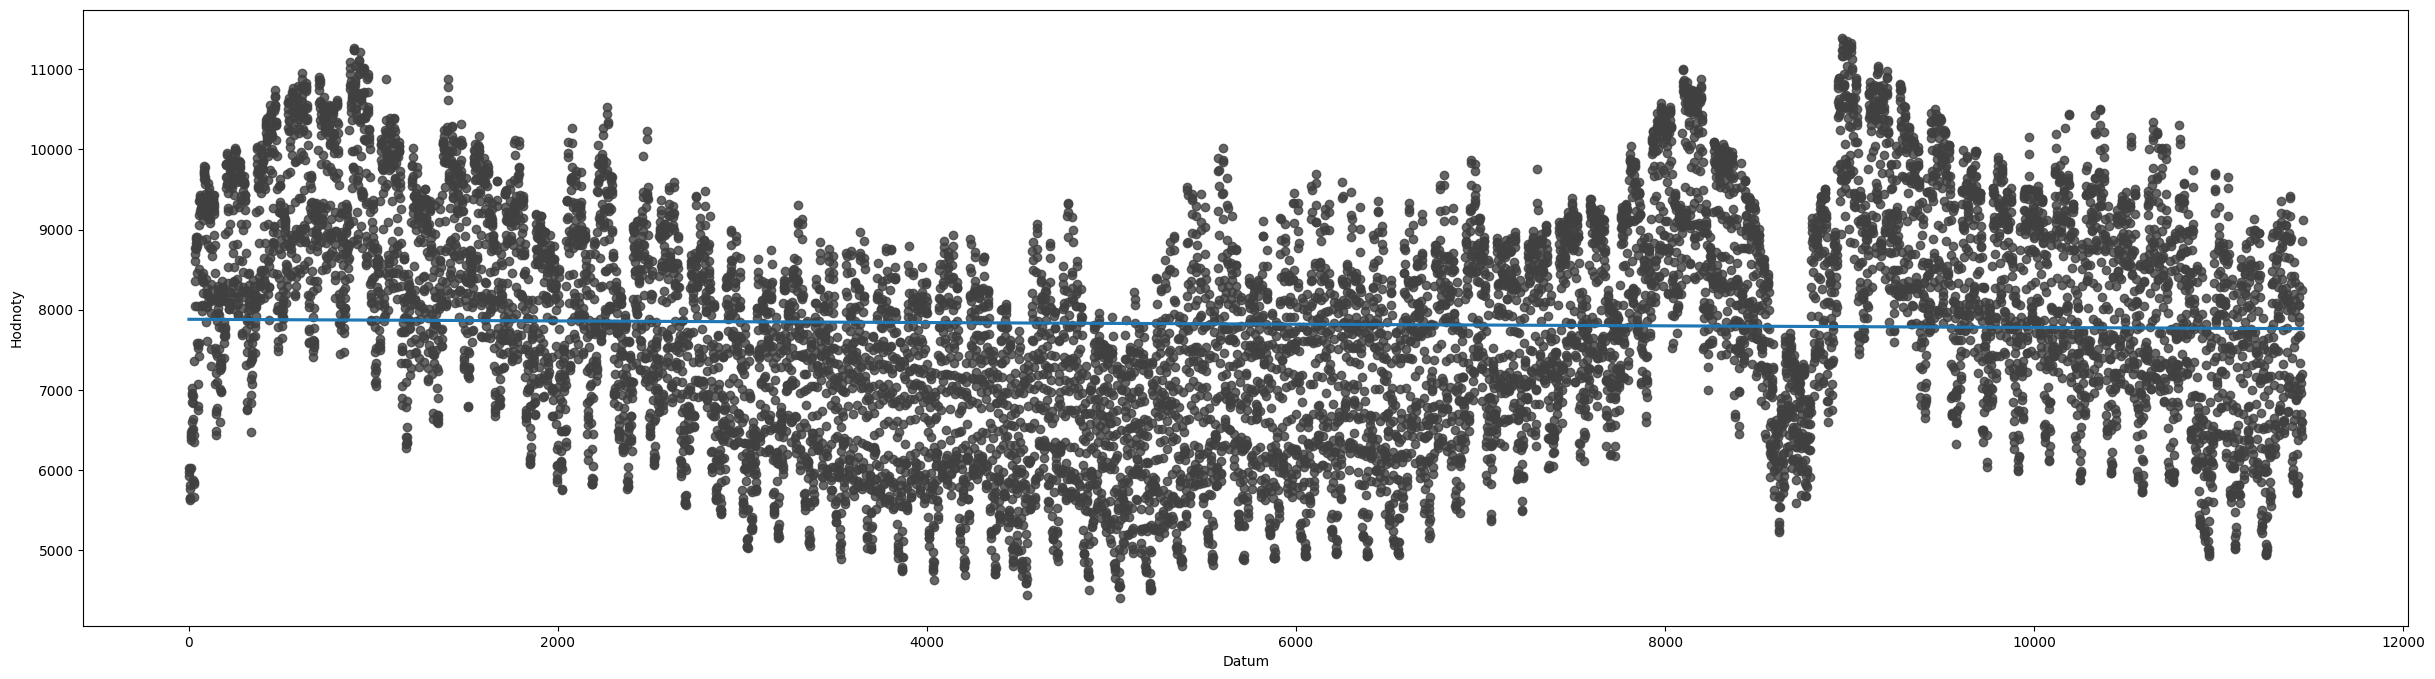

In [12]:
plt.figure(figsize=(30,8))
sns.lineplot(data=df,x='Date',y='Values').set_title('Hodinová spotřeba za celé období')
plt.xlabel('Datum')
plt.ylabel('Hodnoty')
plt.grid()
plt.show()
plt.figure(figsize=(30,8))
sns.regplot(x='Time', y='Values', data=df, ci=None, scatter_kws=dict(color='0.25'))
plt.xlabel('Datum')
plt.ylabel('Hodnoty')
plt.show()

Z grafu vyplýva určitá cyklickosť. Opakujúci sa vzorec klesania spotreby v období letných mesiacov a opätovného nárastu smerom k zimným mesiacom. 

**Zaujímavosťou je obdobie okolo Januára (Leden) 2024. Značný pokles spotreby sa vymyká predpokladu vyššej spotreby, ktorá môže byť ovplyvnená napríklad zmenou počasia alebo chovaním .**

### Pokračovanie analýzy dat

In [13]:
dfbyDay = df.groupby('WeekDay').mean()

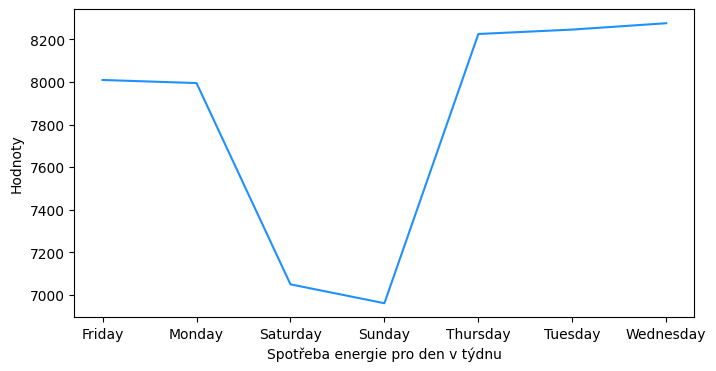

In [14]:
plt.figure(figsize=(8,4))
plt.plot(dfbyDay.index, dfbyDay['Values'], 'dodgerblue')
plt.xlabel('Spotřeba energie pro den v týdnu')
plt.ylabel('Hodnoty')
plt.show()

Nižší spotřeba energie v sobotu a neděli v přuměrů (přibližne) o 1000 jednotek oproti bežnému dni v týdnu. Důvodu může být vícero, lidi nejsou v práci a společnosti nepotřebují odebírat tolik energie. Zároveň mnoho lidí trávi více času jinými aktivitami (například venkovními sportovními). 

**Denní průmerná spotřeba je důležitý ukazovatel, který umožňuje doporučit, kdy zvýšit a kdy znížit produkci energie.**

In [15]:
dfbyMonth = df.drop(columns=['WeekDay'])


In [16]:
dfbyMonth = dfbyMonth.groupby('Month').mean()

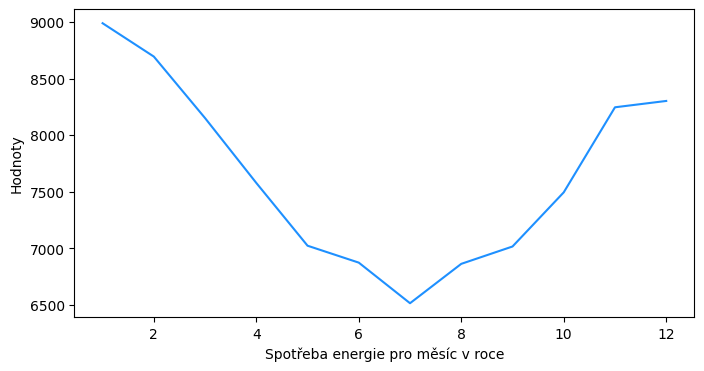

In [17]:
plt.figure(figsize=(8,4))
plt.plot(dfbyMonth.index, dfbyMonth['Values'], 'dodgerblue')
plt.xlabel('Spotřeba energie pro měsíc v roce')
plt.ylabel('Hodnoty')
plt.show()

Nepřekvapive je nejvyšší spotřeba energie v období zimních měsícu. Postupně klesá v období od jarních až letních měsícu.

**Produkce energie by se měla zvyšovat po období letních měsícu, aby zabezpečila dostatok energie pro spotřebitele**

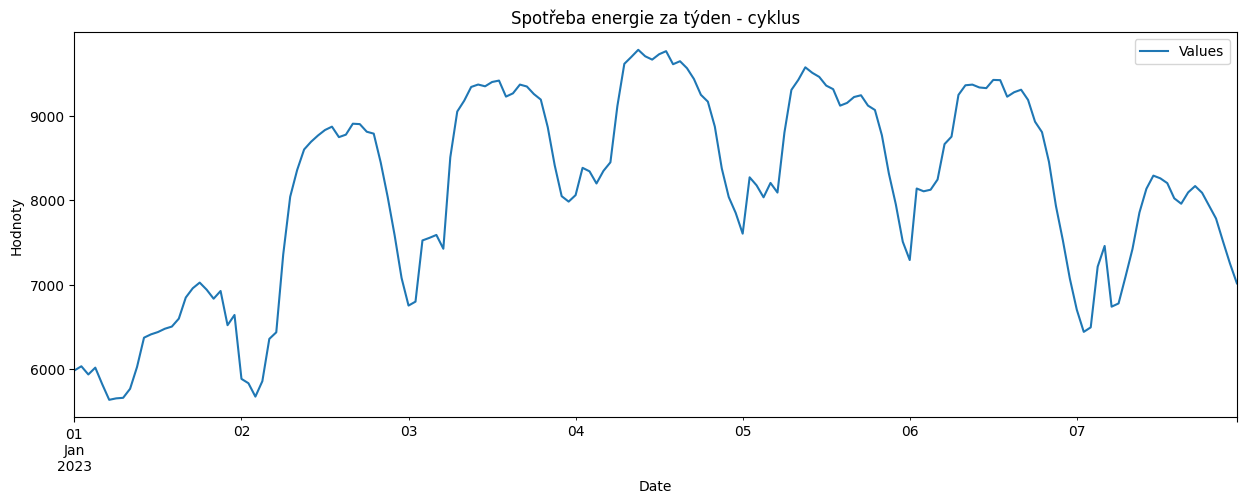

In [18]:
df["2023-01-01 00:00:00" : "2023-01-07 23:00:00"][["Values"]].plot(style="-", figsize=(15, 5), title="Spotřeba energie za týden - cyklus")
plt.ylabel('Hodnoty')
plt.show()

In [19]:
dfbyHour = df.drop(columns=['WeekDay'])
dfbyHour = dfbyHour.groupby('Hour').mean()

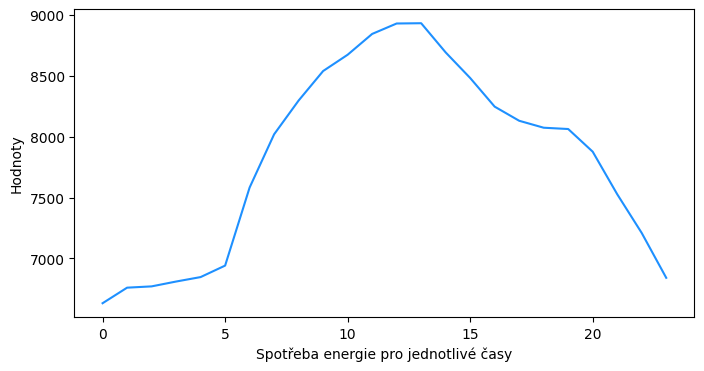

In [20]:
plt.figure(figsize=(8,4))
plt.plot(dfbyHour.index, dfbyHour['Values'], 'dodgerblue')
plt.xlabel('Spotřeba energie pro jednotlivé časy')
plt.ylabel('Hodnoty')
plt.show()

Nejnižší spotřeba energie je v čase od 0 do 5 hodiny ranné. Postupně prudce stoupá a dosahuje nejvyšší hranici okolo 14 hodiny odpoledne. Postupně klesá a blíži se opětovně k ranním hodnotám po 20 hodine.

## Predikcia posledného týždňa 

In [31]:
cutOffDate = df.index[-6*24 - 9]
print(f"Posledný týždeň začínajúci od rána {cutOffDate}")



Posledný týždeň začínajúci od rána 2024-04-16 00:00:00


**Pozn.: Pre jednoduchosť predikcie počítam poslený týždeň dátumovo spolu s 8 hodinami nového dňa. To znamená že sa nejedná o presne 7 dní ale o 6 dní a 8 hodín nového dňa.**

train size: 11304 and test 152


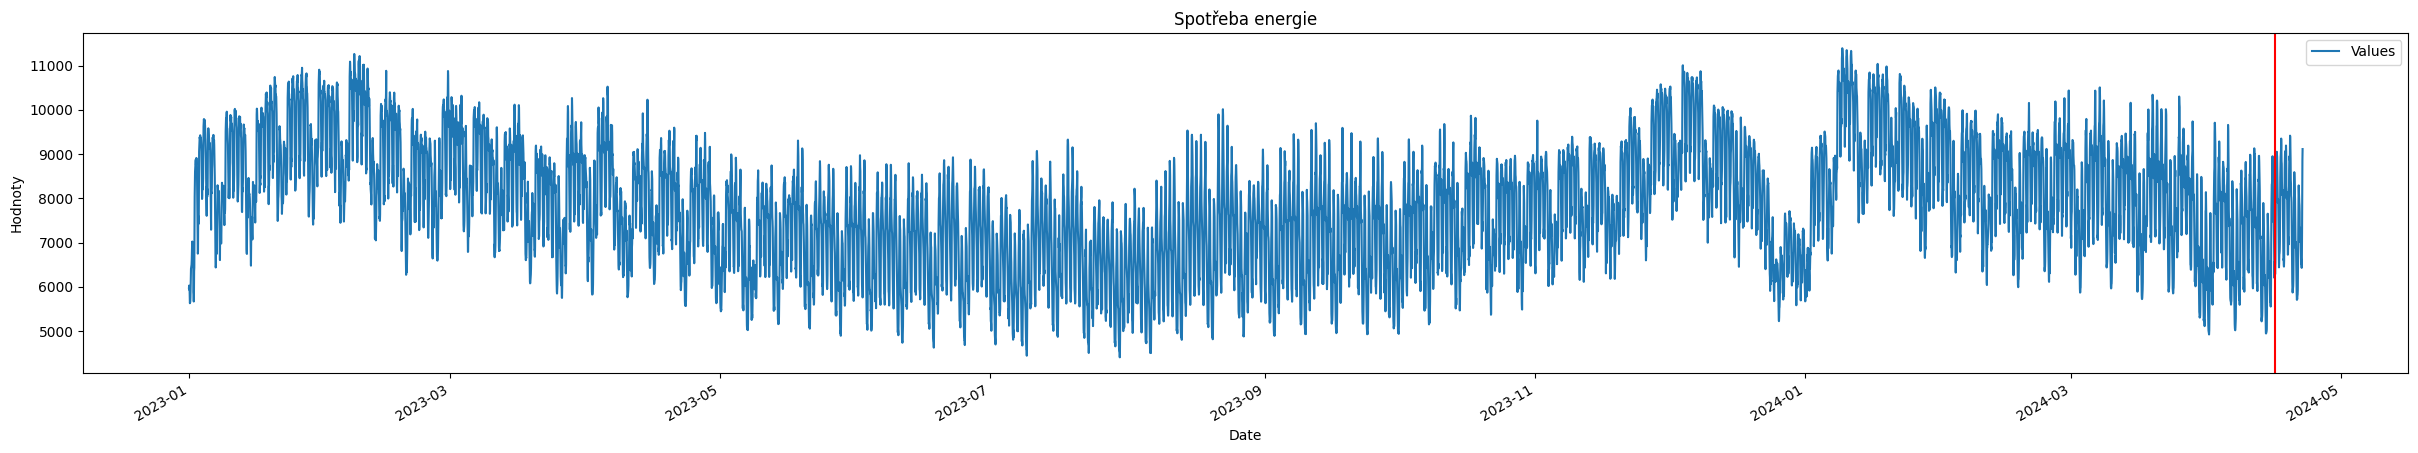

In [35]:
train = df.loc[df.index <= cutOffDate]
test = df.loc[df.index > cutOffDate]

print(f"train size: {len(train)} and test {len(test)}")

df[["Values"]].plot(style="-", figsize=(30, 5), title="Spotřeba energie")
plt.ylabel('Hodnoty')
plt.axvline(x=cutOffDate, color='r')
plt.show()

In [37]:
df.head()
df.drop(columns='WeekDay')

,Values,Time,Hour,Day,Year,Month,prediction
Date,,,,,,,
2023-01-01 00:00:00,5978.383301,0,0,1,2023,1,NaN
2023-01-01 01:00:00,6028.000000,1,1,1,2023,1,NaN
2023-01-01 02:00:00,5930.549805,2,2,1,2023,1,NaN
2023-01-01 03:00:00,6011.733398,3,3,1,2023,1,NaN
2023-01-01 04:00:00,5814.299805,4,4,1,2023,1,NaN
...,...,...,...,...,...,...,...
2024-04-22 04:00:00,6600.433105,11451,4,22,2024,4,5824.948730
2024-04-22 05:00:00,7198.100098,11452,5,22,2024,4,6034.508789
2024-04-22 06:00:00,8250.666992,11453,6,22,2024,4,6960.247559


Jednoduchá funkcia na porovnanie chybovosti v percentách oproti skutočným hodnotám.

In [38]:
def meanAbsolutErrorAaPercentage(real, predicted):
    real = np.array(real)
    predicted = np.array(predicted)

    return np.mean(np.abs((real - predicted) / real)) * 100

In [49]:

FEATURES = ["Hour", "Year", "Month", "Day"]
TARGET = "Values"

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

# define and XGB regressor, fit it on our train data and use it to predict our test data
regressor = xgb.XGBRegressor(n_estimators=1000, early_stoppin_rounds=50, learning_rate=0.01)

regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)
regressorOutput = regressor.predict(X_test)

prediction = pd.DataFrame(data=regressorOutput, index=X_test.index, columns=["prediction"])

df = df.merge(prediction, how="left", left_index=True, right_index=True)

# our predictions are at the end of the dataframe, so we should print that
df.tail()

[0]	validation_0-rmse:1376.80254	validation_1-rmse:1038.20689
[100]	validation_0-rmse:857.94194	validation_1-rmse:626.48863


C:\Users\jakub\Desktop\eon\venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:13:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "early_stoppin_rounds" } are not used.

  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:711.44177	validation_1-rmse:633.21534
[300]	validation_0-rmse:651.46753	validation_1-rmse:693.24294
[400]	validation_0-rmse:608.92113	validation_1-rmse:754.14632
[500]	validation_0-rmse:575.65006	validation_1-rmse:775.90863
[600]	validation_0-rmse:547.56062	validation_1-rmse:790.81880
[700]	validation_0-rmse:518.71892	validation_1-rmse:808.31194
[800]	validation_0-rmse:502.52165	validation_1-rmse:818.22612
[900]	validation_0-rmse:491.76312	validation_1-rmse:822.57967
[999]	validation_0-rmse:472.86805	validation_1-rmse:814.37272


,Values,Time,Hour,Day,Year,Month,WeekDay,prediction
Date,,,,,,,,
2024-04-22 04:00:00,6600.433105,11451,4,22,2024,4,Monday,5824.948730
2024-04-22 05:00:00,7198.100098,11452,5,22,2024,4,Monday,6034.508789
2024-04-22 06:00:00,8250.666992,11453,6,22,2024,4,Monday,6960.247559
2024-04-22 07:00:00,8862.599609,11454,7,22,2024,4,Monday,7783.143555
2024-04-22 08:00:00,9113.727539,11455,8,22,2024,4,Monday,8134.017090


In [50]:
testDf = df.loc[df.index > cutOffDate]

yReal = testDf["Values"]
yPredicted = testDf["prediction"]

print(f"percentage error: {meanAbsolutErrorAaPercentage(yReal, yPredicted):.4f}")


percentage error: 9.6658


**Percentuálna chybovosť okolo 10%, presne 9.6658.**

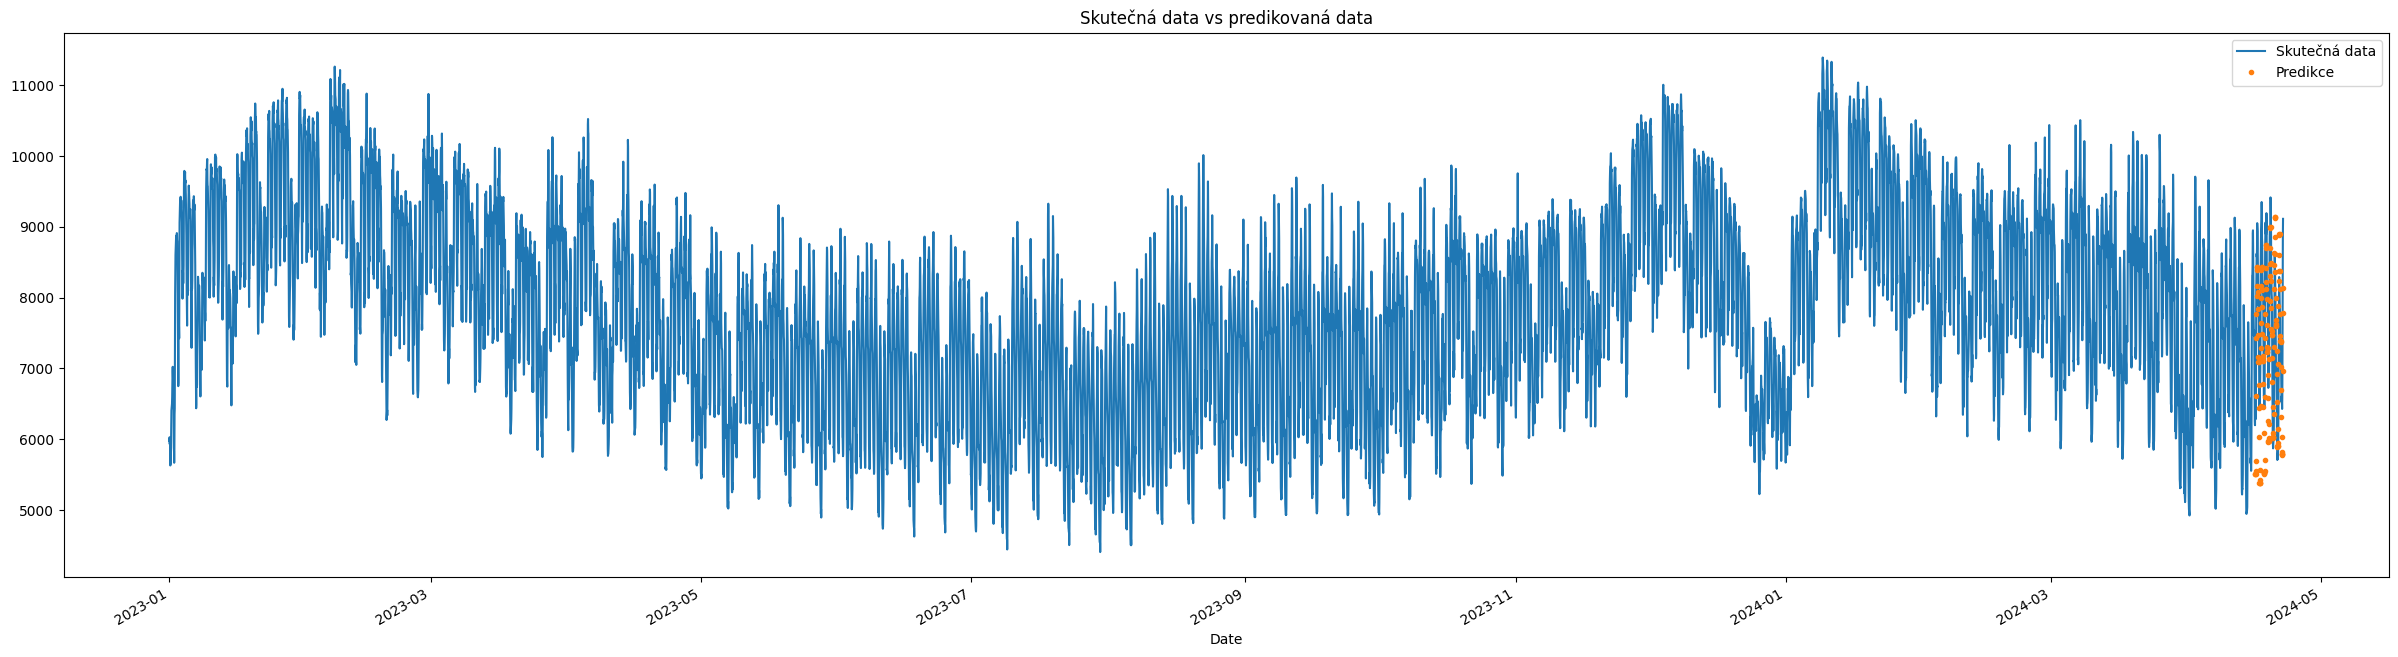

In [51]:
ax = df[[TARGET]].plot(figsize=(30,8))
df["prediction"].plot(ax=ax, style=".")
ax.legend(["Skutečná data", "Predikce"])
ax.set_title("Skutečná data vs predikovaná data")
plt.show()

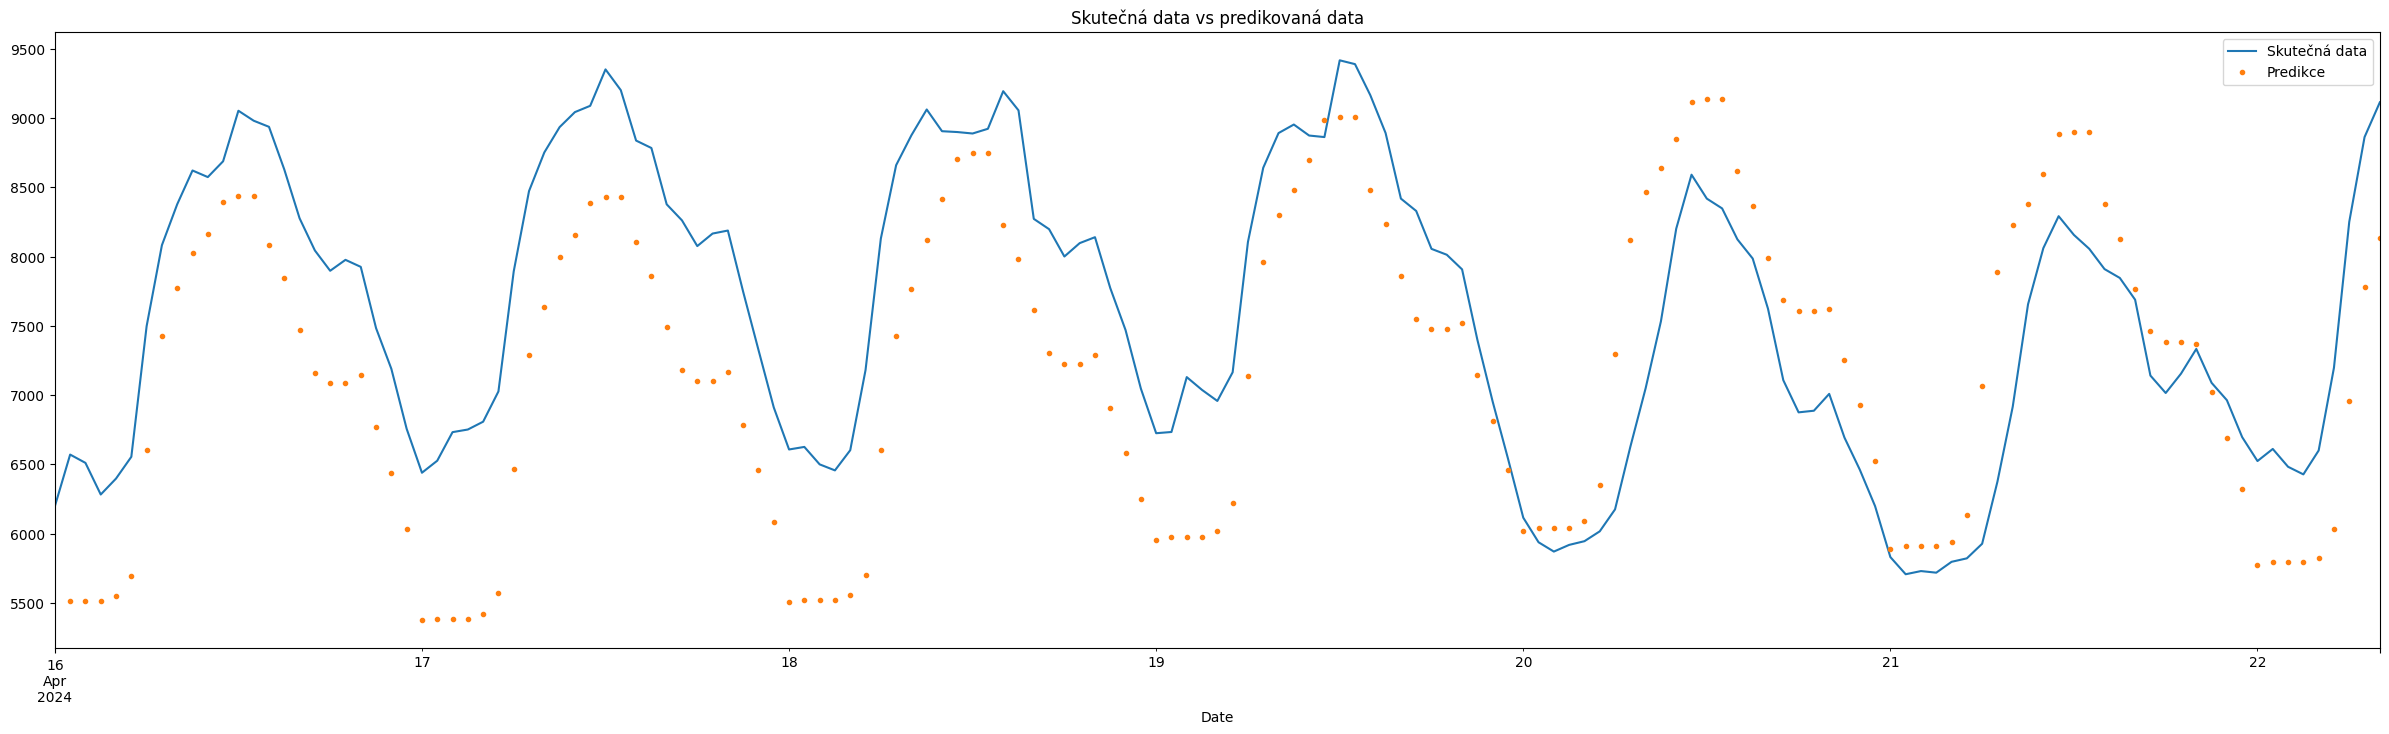

In [52]:
ax = df["2024-04-16 00:00:00" : "2024-04-22 08:00:00"][[TARGET]].plot(figsize=(30,8))
df["2024-04-16 00:00:00" : "2024-04-22 08:00:00"]["prediction"].plot(ax=ax, style=".")
ax.legend(["Skutečná data", "Predikce"])
ax.set_title("Skutečná data vs predikovaná data")
plt.show()

#### Hoci predikcia nie je úplne presná a chybovosť sa pohybuje okolo 10%, je možné vidieť, že zachytáva vzorec správania resp. cyklovosť spotreby. 